## Creating the Bandits

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import uniform
%matplotlib inline
sns.set_palette('colorblind')

class Bandit:
    def __init__(self):
        self._p = uniform(0.2, .3)
    
    @property
    def p(self):
        return self._p
    
    def trial(self):
        return uniform(0, 1) <= self.p
    
    def trials(self, n):
        return np.array([self.trial() for trial in range(n)])
        
bandits = [Bandit() for bandit in range(3)]

## Sample Size Effect on Distribution of Sample Means

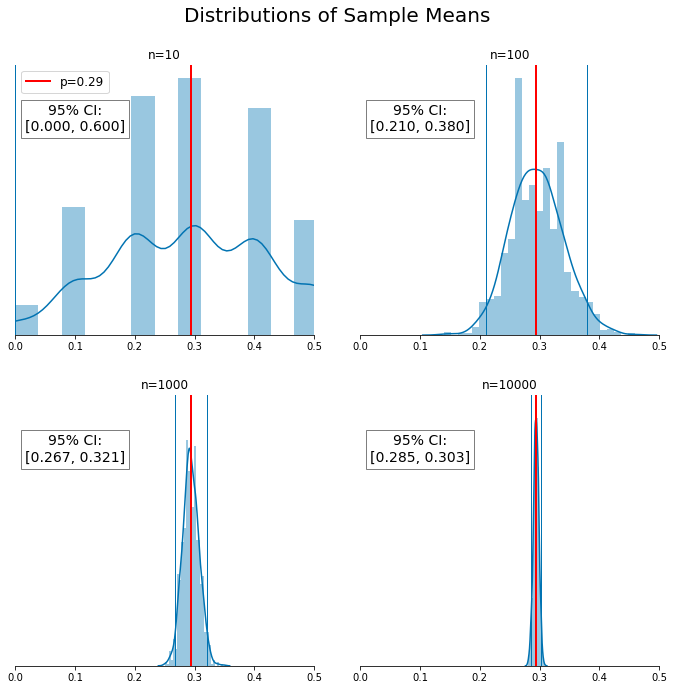

In [157]:
sample_sizes = [10, 100, 1000, 10000]
num_samples = 1000

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for n, ax in zip(sample_sizes, axs.flatten()):
    means = np.array([bandits[0].trials(n).mean() for sample in range(num_samples)])
    sns.distplot(means, ax=ax)
    ax.axvline(bandits[0].p, c='red', linewidth=2, label='p={:0.2f}'.format(bandits[0].p))
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)
    ax.axvline(upper_bound, linewidth=1)
    ax.axvline(lower_bound, linewidth=1)
    ax.text(x=.20, y=.8, s='95% CI:\n[{:0.3f}, {:0.3f}]'.format(lower_bound, upper_bound),
            bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes,
            verticalalignment='center', horizontalalignment='center',
            fontsize=14)
    ax.set_xlim(0, .5)
    ax.set_yticks([])
    ax.set_ylabel(None)
    for spine in ax.spines:
        if spine != 'bottom':
            ax.spines[spine].set_visible(False)
    ax.set_title('n={}'.format(n))

fig.suptitle('Distributions of Sample Means', fontsize=20)
axs[0,0].legend(loc='upper left', fontsize=12)
plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.90)
plt.show()